In [5]:
import pandas as pd;
df = pd.read_csv("data/diabetes.csv")
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

## Определение бизнес целей:
1. Предсказание риска развития диабета. Данная цель поможет определить людей с высоким риском заболевания, что полезно для профилактических программ и эффективного медицинского вмешательства.
2. Анализ ключевых факторов, влияющих на диабет. Позволит выявить основные факторы риска и разработать рекомендации для улучшения здоровья населения.

## Определение целей технического проекта:
1. Построить модель, которая сможет прогнозировать наличие диабета, основываясь на других параметрах.
2. Провести анализ данных для выявления факторов, которые больше всего влияют на риск развития диабета.

## Проверим данные на пустые значения

In [6]:
for i in df.columns:
    null_rate = df[i].isnull().sum() / len(df) * 100
    if null_rate > 0:
        print(f'{i} Процент пустых значений: %{null_rate:.2f}')

print(df.isnull().sum())

df.isnull().any()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

Пустые и номинальные значения отсутствуют.
Разделение данных на обучающую, тестовую и контрольную выборки

In [7]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

train_data, val_data = train_test_split(df, test_size=0.2, random_state=42)

print("Размер обучающей выборки: ", len(train_data))
print("Размер контрольной выборки: ", len(val_data))
print("Размер тестовой выборки: ", len(test_data))

Размер обучающей выборки:  614
Размер контрольной выборки:  154
Размер тестовой выборки:  154


Оценка сбалансированности целевой переменной (Outcome). Визуализация распределения целевой переменной в выборках (гистограмма)

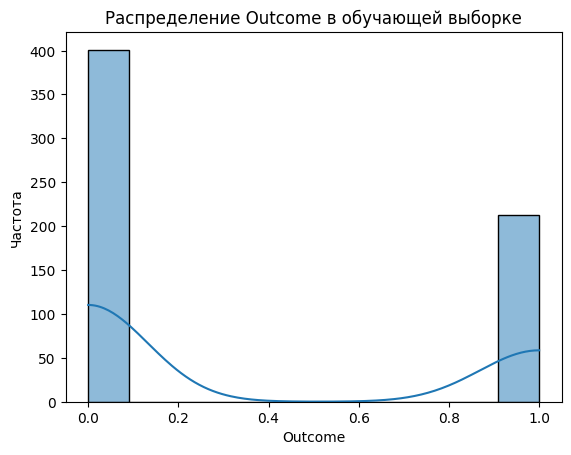

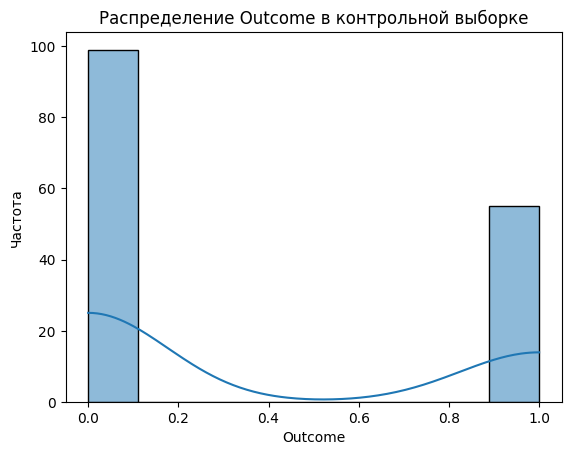

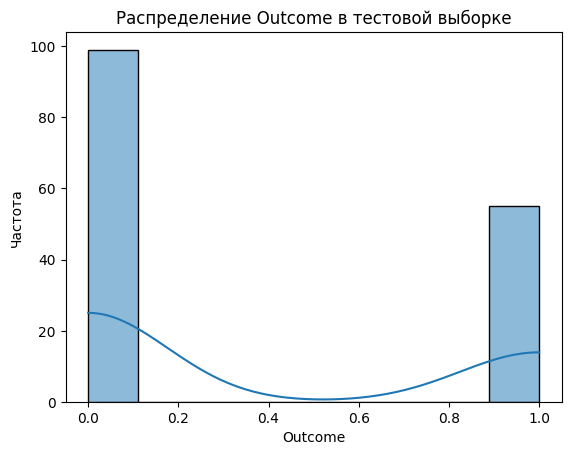

Среднее значение Outcome в обучающей выборке:  0.3469055374592834
Среднее значение Outcome в контрольной выборке:  0.35714285714285715
Среднее значение Outcome в тестовой выборке:  0.35714285714285715


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_outcome_distribution(data, title):
    sns.histplot(data['Outcome'], kde=True)
    plt.title(title)
    plt.xlabel('Outcome')
    plt.ylabel('Частота')
    plt.show()

plot_outcome_distribution(train_data, 'Распределение Outcome в обучающей выборке')
plot_outcome_distribution(val_data, 'Распределение Outcome в контрольной выборке')
plot_outcome_distribution(test_data, 'Распределение Outcome в тестовой выборке')

print("Среднее значение Outcome в обучающей выборке: ", train_data['Outcome'].mean())
print("Среднее значение Outcome в контрольной выборке: ", val_data['Outcome'].mean())
print("Среднее значение Outcome в тестовой выборке: ", test_data['Outcome'].mean())

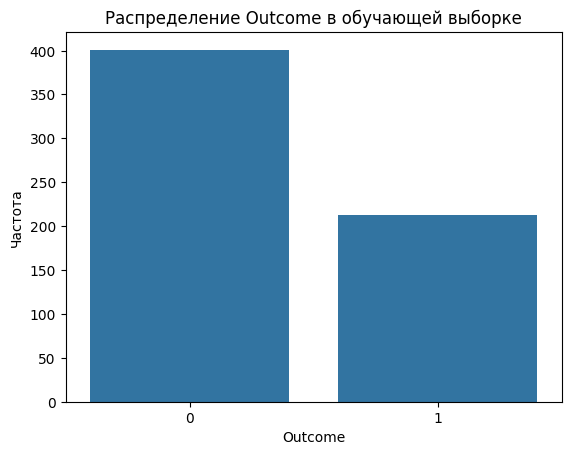

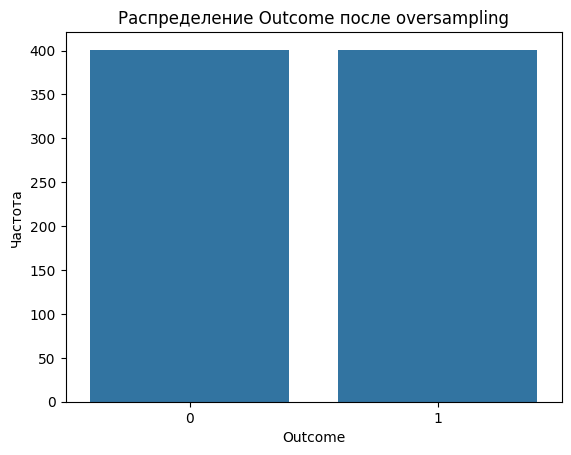

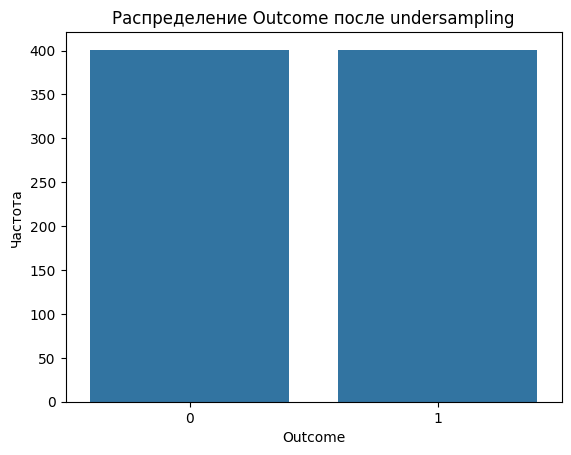

Размер обучающей выборки после oversampling и undersampling:  802


In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

sns.countplot(x=train_data['Outcome'])
plt.title('Распределение Outcome в обучающей выборке')
plt.xlabel('Outcome')
plt.ylabel('Частота')
plt.show()

ros = RandomOverSampler(random_state=42)
X_train = train_data.drop(columns=['Outcome'])
y_train = train_data['Outcome']

X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

sns.countplot(x=y_resampled)
plt.title('Распределение Outcome после oversampling')
plt.xlabel('Outcome')
plt.ylabel('Частота')
plt.show()

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_resampled, y_resampled)

sns.countplot(x=y_resampled)
plt.title('Распределение Outcome после undersampling')
plt.xlabel('Outcome')
plt.ylabel('Частота')
plt.show()

print("Размер обучающей выборки после oversampling и undersampling: ", len(X_resampled))

## Конструирование признаков
Унитарное кодирование - замена категориальных признаков бинарными значениями.

Дискретизация числовых признаков - процесс преобразования непрерывных числовых значений в дискретные категории или интервалы (бины).

In [10]:
categorical_features = ['Pregnancies', 'Outcome']

train_data_encoded = pd.get_dummies(train_data, columns=categorical_features)
val_data_encoded = pd.get_dummies(val_data, columns=categorical_features)
test_data_encoded = pd.get_dummies(test_data, columns=categorical_features)

print("Столбцы train_data_encoded:", train_data_encoded.columns.tolist())
print("Столбцы val_data_encoded:", val_data_encoded.columns.tolist())
print("Столбцы test_data_encoded:", test_data_encoded.columns.tolist())

train_data_encoded['Glucose_binned'] = pd.cut(train_data_encoded['Glucose'], bins=5, labels=False)
val_data_encoded['Glucose_binned'] = pd.cut(val_data_encoded['Glucose'], bins=5, labels=False)
test_data_encoded['Glucose_binned'] = pd.cut(test_data_encoded['Glucose'], bins=5, labels=False)

Столбцы train_data_encoded: ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Pregnancies_0', 'Pregnancies_1', 'Pregnancies_2', 'Pregnancies_3', 'Pregnancies_4', 'Pregnancies_5', 'Pregnancies_6', 'Pregnancies_7', 'Pregnancies_8', 'Pregnancies_9', 'Pregnancies_10', 'Pregnancies_11', 'Pregnancies_12', 'Pregnancies_13', 'Pregnancies_14', 'Pregnancies_15', 'Pregnancies_17', 'Outcome_0', 'Outcome_1']
Столбцы val_data_encoded: ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Pregnancies_0', 'Pregnancies_1', 'Pregnancies_2', 'Pregnancies_3', 'Pregnancies_4', 'Pregnancies_5', 'Pregnancies_6', 'Pregnancies_7', 'Pregnancies_8', 'Pregnancies_9', 'Pregnancies_10', 'Pregnancies_11', 'Pregnancies_12', 'Pregnancies_13', 'Outcome_0', 'Outcome_1']
Столбцы test_data_encoded: ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Pregnancies_0', 'Pregnancies_1'

## Ручной синтез
Создание новых признаков на основе экспертных знаний и логики предметной области. К примеру, можно создать признак, который отражает соотношение уровня глюкозы к индексу массы тела

In [11]:
train_data_encoded['glucose_to_bmi'] = train_data_encoded['Glucose'] / train_data_encoded['BMI']
val_data_encoded['glucose_to_bmi'] = val_data_encoded['Glucose'] / val_data_encoded['BMI']
test_data_encoded['glucose_to_bmi'] = test_data_encoded['Glucose'] / test_data_encoded['BMI']
test_data_encoded

Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
668       98             58             33      190  34.0   
324      112             75             32        0  35.7   
624      108             64              0        0  30.8   
690      107             80              0        0  24.6   
473      136             90              0        0  29.9   
..       ...            ...            ...      ...   ...   
355      165             88              0        0  30.4   
534       77             56             30       56  33.3   
344       95             72              0        0  36.8   
296      146             70             38      360  28.0   
462       74             70             40       49  35.3   

     DiabetesPedigreeFunction  Age  Pregnancies_0  Pregnancies_1  \
668                     0.430   43          False          False   
324                     0.148   21          False          False   
624                     0.158   21          False          False   
690                     0.856   34          False          False   
473                     0.210   50          False          False   
..                        ...  ...            ...            ...   
355                     0.302   49          False          False   
534                     1.251   24          False           True   
344                     0.485   57          False          False   
296                     0.337   29          False          False   
462                     0.705   39          False          False   

     Pregnancies_2  ...  Pregnancies_8  Pregnancies_9  Pregnancies_10  \
668          False  ...          False          False           False   
324           True  ...          False          False           False   
624           True  ...          False          False           False   
690          False  ...           True          False           False   
473          False  ...          False          False           False   
..             ...  ...            ...            ...             ...   
355          False  ...          False           True           False   
534          False  ...          False          False           False   
344          False  ...           True          False           False   
296           True  ...          False          False           False   
462          False  ...           True          False           False   

     Pregnancies_11  Pregnancies_12  Pregnancies_13  Outcome_0  Outcome_1  \
668           False           False           False       True      False   
324           False           False           False       True      False   
624           False           False           False       True      False   
690           False           False           False       True      False   
473           False           False           False       True      False   
..              ...             ...             ...        ...        ...   
355           False           False           False      False       True   
534           False           False           False       True      False   
344           False           False           False       True      False   
296           False           False           False      False       True   
462           False           False           False       True      False   

     Glucose_binned  glucose_to_bmi  
668               1        2.882353  
324               1        3.137255  
624               1        3.506494  
690               1        4.349593  
473               2        4.548495  
..              ...             ...  
355               3        5.427632  
534               0        2.312312  
344               1        2.581522  
296               3        5.214286  
462               0        2.096317  

[154 rows x 25 columns]

## Масштабирование признаков
Масштабирование признаков - это процесс изменения диапазона признаков, чтобы равномерно распределить значения.

In [12]:
from sklearn.preprocessing import StandardScaler
numerical_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

scaler = StandardScaler()
train_data_encoded[numerical_features] = scaler.fit_transform(train_data_encoded[numerical_features])
val_data_encoded[numerical_features] = scaler.transform(val_data_encoded[numerical_features])
test_data_encoded[numerical_features] = scaler.transform(test_data_encoded[numerical_features])

## Конструирование признаков с применением фреймворка Featuretools


In [13]:
import featuretools as ft

print("Столбцы в df:", df.columns.tolist())
print("Столбцы в train_data_encoded:", train_data_encoded.columns.tolist())
print("Столбцы в val_data_encoded:", val_data_encoded.columns.tolist())
print("Столбцы в test_data_encoded:", test_data_encoded.columns.tolist())

# Удаление дубликатов по всем столбцам (если нет уникального идентификатора)
df = df.drop_duplicates()
duplicates = train_data_encoded[train_data_encoded.duplicated(keep=False)]

#Создание EntitySet
es = ft.EntitySet(id='diabetes_data')

#Добавление датафрейма в EntitySet
es = es.add_dataframe(dataframe_name='patients', dataframe=train_data_encoded, index='id')

#Генерация признаков
feature_matrix, feature_defs = ft.dfs(entityset=es, target_dataframe_name='patients', max_depth=2)

feature_matrix

Столбцы в df: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
Столбцы в train_data_encoded: ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Pregnancies_0', 'Pregnancies_1', 'Pregnancies_2', 'Pregnancies_3', 'Pregnancies_4', 'Pregnancies_5', 'Pregnancies_6', 'Pregnancies_7', 'Pregnancies_8', 'Pregnancies_9', 'Pregnancies_10', 'Pregnancies_11', 'Pregnancies_12', 'Pregnancies_13', 'Pregnancies_14', 'Pregnancies_15', 'Pregnancies_17', 'Outcome_0', 'Outcome_1', 'Glucose_binned', 'glucose_to_bmi']
Столбцы в val_data_encoded: ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Pregnancies_0', 'Pregnancies_1', 'Pregnancies_2', 'Pregnancies_3', 'Pregnancies_4', 'Pregnancies_5', 'Pregnancies_6', 'Pregnancies_7', 'Pregnancies_8', 'Pregnancies_9', 'Pregnancies_10', 'Pregnancies_11', 'Pregnancies_12', 'Pregnancies_13', 'Outc

c:\Users\tabee\AIM_PIbd-31_Tabeev_A.P\.venv\Lib\site-packages\featuretools\entityset\entityset.py:1733: UserWarning: index id not found in dataframe, creating new integer column
  warnings.warn(
c:\Users\tabee\AIM_PIbd-31_Tabeev_A.P\.venv\Lib\site-packages\featuretools\synthesis\deep_feature_synthesis.py:169: UserWarning: Only one dataframe in entityset, changing max_depth to 1 since deeper features cannot be created
  warnings.warn(


Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
id                                                                
0   -1.151398      -3.752683      -1.322774 -0.701206 -4.135256   
1   -0.276643       0.680345       0.233505 -0.701206 -0.489169   
2    0.566871      -1.265862      -0.090720  0.013448 -0.424522   
3    1.254179      -1.049617      -1.322774 -0.701206 -1.303720   
4    0.410665       0.572222       1.076490  2.484601  1.838121   
..        ...            ...            ...       ...       ...   
609  0.566871      -0.292759       0.946800  0.504235 -0.437451   
610 -0.776503       2.842797      -1.322774 -0.701206 -1.239073   
611 -0.620297       0.896590       1.076490 -0.701206  1.760544   
612  0.629354      -3.752683      -1.322774 -0.701206  1.346804   
613  0.129493       1.437203      -1.322774 -0.701206 -1.226144   

     DiabetesPedigreeFunction       Age  Pregnancies_0  Pregnancies_1  \
id                                                                      
0                   -0.490735 -1.035940          False          False   
1                    2.415030  1.487101          False          False   
2                    0.549161 -0.948939          False           True   
3                   -0.639291  2.792122           True          False   
4                   -0.686829  1.139095          False          False   
..                        ...       ...            ...            ...   
609                 -0.172824 -0.600933          False          False   
610                 -0.778934 -0.513932          False           True   
611                  1.981245  0.443084          False          False   
612                 -0.784877 -0.339929           True          False   
613                 -0.615522 -1.035940           True          False   

     Pregnancies_2  ...  Pregnancies_11  Pregnancies_12  Pregnancies_13  \
id                  ...                                                   
0             True  ...           False           False           False   
1            False  ...           False           False           False   
2            False  ...           False           False           False   
3            False  ...           False           False           False   
4            False  ...           False           False           False   
..             ...  ...             ...             ...             ...   
609          False  ...           False           False           False   
610          False  ...           False           False           False   
611          False  ...           False           False           False   
612          False  ...           False           False           False   
613          False  ...           False           False           False   

     Pregnancies_14  Pregnancies_15  Pregnancies_17  Outcome_0  Outcome_1  \
id                                                                          
0             False           False           False       True      False   
1             False           False           False      False       True   
2             False           False           False       True      False   
3             False           False           False       True      False   
4             False           False           False      False       True   
..              ...             ...             ...        ...        ...   
609           False           False           False       True      False   
610           False           False           False       True      False   
611           False           False           False      False       True   
612           False           False           False      False       True   
613           False           False           False       True      False   

     Glucose_binned  glucose_to_bmi  
id                                   
0                 2             inf  
1                 2        3.971631  
2                 3        4.843206  
3               

## Оценка качества

Время обучения модели: 0.01 секунд
Среднеквадратичная ошибка: 704.68
Коэффициент детерминации (R²): 0.30


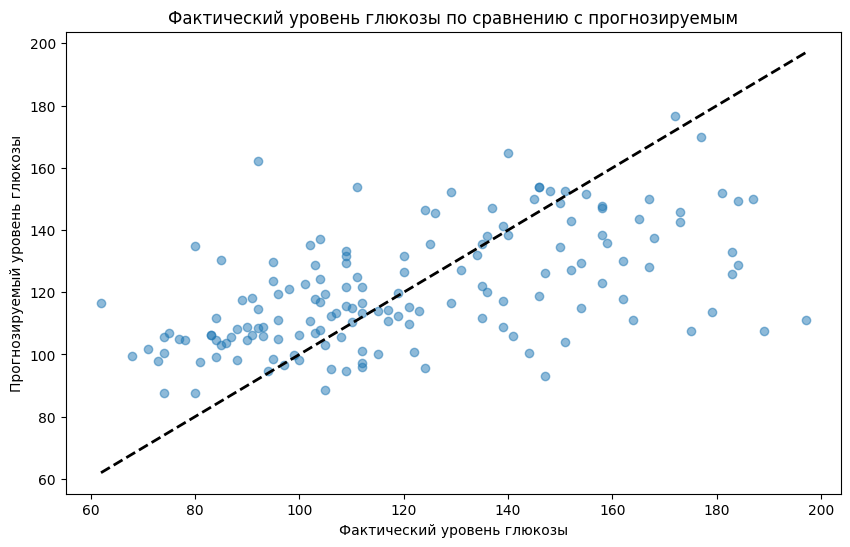

In [ ]:
import time
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Разделение данных на обучающую и валидационную выборки. Удаляем целевую переменную
X = df.drop('Glucose', axis=1)
y = df['Glucose']

# One-hot encoding для категориальных переменных (преобразование категориальных объектов в числовые)
X = pd.get_dummies(X, drop_first=True)

# Проверяем, есть ли пропущенные значения, и заполняем их медианой или другим подходящим значением
X.fillna(X.median(), inplace=True)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели
model = LinearRegression()

# Начинаем отсчет времени
start_time = time.time()
model.fit(X_train, y_train)

# Время обучения модели
train_time = time.time() - start_time

# Предсказания и оценка модели
val_predictions = model.predict(X_val)
mse = mean_squared_error(y_val, val_predictions)
r2 = r2_score(y_val, val_predictions)

print(f'Время обучения модели: {train_time:.2f} секунд')
print(f'Среднеквадратичная ошибка: {mse:.2f}')
print(f'Коэффициент детерминации (R²): {r2:.2f}')

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.scatter(y_val, val_predictions, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2)
plt.xlabel('Фактический уровень глюкозы')
plt.ylabel('Прогнозируемый уровень глюкозы')
plt.title('Фактический уровень глюкозы по сравнению с прогнозируемым')
plt.show()